In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [18]:
# Load the data
data = pd.read_csv(r"C:\Users\Alisha DJ\Downloads\data of big mart.csv")

In [19]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [20]:
data.shape

(8523, 12)

In [21]:
# Drop the unnecessary columns
data = data.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)


In [22]:
# Replace the missing values with the median of their respective columns
data.fillna(data.median(), inplace=True)

C:\Users\Alisha DJ\AppData\Local\Temp\ipykernel_1840\3610095317.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.median(), inplace=True)


In [23]:
# One-hot encode the categorical variables
data = pd.get_dummies(data, columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])


In [24]:
# Scale the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
data[num_cols] = scaler.fit_transform(data[num_cols])

In [25]:
# Split the data into training and testing sets
X = data.drop(['Item_Outlet_Sales'], axis=1)
y = data['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# Implement lasso regression from scratch
def lasso_regression(X_train, y_train, alpha, n_iterations, learning_rate):
    n_samples, n_features = X_train.shape
    theta = np.zeros(n_features)
    for i in range(n_iterations):
        y_pred = X_train.dot(theta)
        error = y_train - y_pred
        gradient = -(1/n_samples) * X_train.T.dot(error) + (alpha/n_samples) * np.sign(theta)
        theta -= learning_rate * gradient
    return theta


In [27]:
# Train the model and get the R-squared score
theta = lasso_regression(X_train.values, y_train.values, alpha=0.1, n_iterations=1000, learning_rate=0.01)
y_pred = X_test.dot(theta)
r2_score = 1 - (sum((y_test - y_pred)**2) / ((len(y_test) - 1) * np.var(y_test, ddof=1)))
print("R-squared score:", r2_score)

R-squared score: 0.5561505296098521


In [28]:
# Check for missing values
print('Number of missing values:')
print(data.isnull().sum())

Number of missing values:
Item_Weight                        0
Item_Visibility                    0
Item_MRP                           0
Outlet_Establishment_Year          0
Item_Outlet_Sales                  0
Item_Fat_Content_LF                0
Item_Fat_Content_Low Fat           0
Item_Fat_Content_Regular           0
Item_Fat_Content_low fat           0
Item_Fat_Content_reg               0
Item_Type_Baking Goods             0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Size_

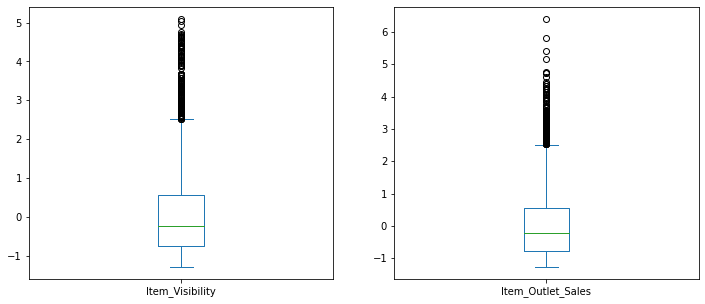

In [29]:
# Check for outliers in numerical variables
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
data['Item_Visibility'].plot.box(showfliers=True)
plt.subplot(1, 2, 2)
data['Item_Outlet_Sales'].plot.box(showfliers=True)
plt.show()

In [30]:
# Remove outliers in 'Item_Visibility'
q1 = data['Item_Visibility'].quantile(0.25)
q3 = data['Item_Visibility'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
data = data[(data['Item_Visibility'] > lower_bound) & (data['Item_Visibility'] < upper_bound)]

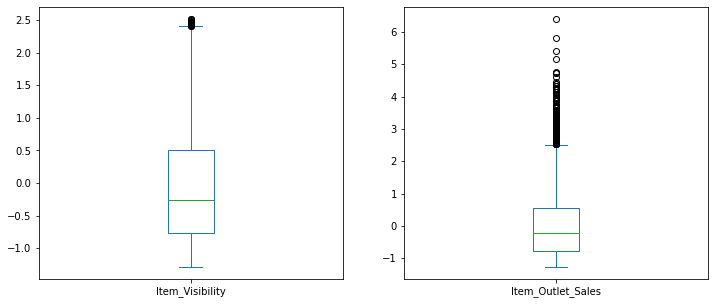

In [31]:
# Check for outliers in numerical variables
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
data['Item_Visibility'].plot.box(showfliers=True)
plt.subplot(1, 2, 2)
data['Item_Outlet_Sales'].plot.box(showfliers=True)
plt.show()

In [33]:
# Convert categorical variables into dummy variables
data = pd.get_dummies(data)

In [ ]:
def lasso_regression(X_train, y_train, alpha, n_iterations, learning_rate):
    n_samples, n_features = X_train.shape
    theta = np.zeros(n_features)
    for i in range(n_iterations):
        y_pred = X_train.dot(theta)
        error = y_train - y_pred
        gradient = -(1/n_samples) * X_train.T.dot(error) + (alpha/n_samples) * np.sign(theta)
        theta -= learning_rate * gradient
        theta = np.maximum(0, np.abs(theta) - alpha * learning_rate) * np.sign(theta)
    return theta

